In [122]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [123]:
import statsmodels.api as sm
import scipy.stats
import seaborn as sns
sns.set_style("whitegrid")

# **Task 3: Load in the Dataset in your Jupyter Notebook**

In [124]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


In [125]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


# **Task 4: Generate Descriptive Statistics and Visualizations**

[Text(0.5, 0, 'Median value of owner-occupied homes'),
 Text(0.5, 1.0, 'Median value of owner-occupied homes boxplot')]

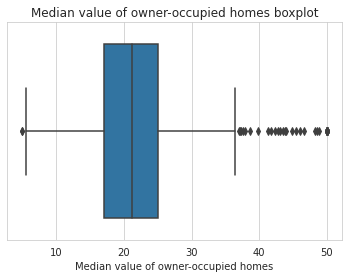

In [126]:
ax = sns.boxplot(x=boston_df["MEDV"])
ax.set(xlabel="Median value of owner-occupied homes", title="Median value of owner-occupied homes boxplot")

[Text(0.5, 0, 'Charles River dummy variable'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Charles River dummy variable distribution')]

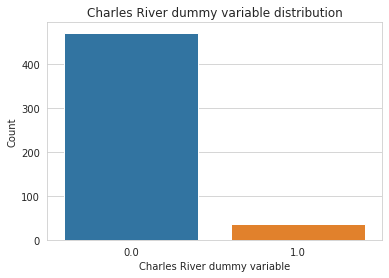

In [127]:
#sns.barplot(data=boston_df, x="CHAS")
ax = sns.countplot(x=boston_df["CHAS"])
ax.set(xlabel="Charles River dummy variable", ylabel="Count", title="Charles River dummy variable distribution")

In [128]:
boston_df["AGE"].describe()

count    506.000000
mean      68.574901
std       28.148861
min        2.900000
25%       45.025000
50%       77.500000
75%       94.075000
max      100.000000
Name: AGE, dtype: float64

[Text(0.5, 0, 'Median value of owner-occupied homes'),
 Text(0, 0.5, 'Discretize AGE'),
 Text(0.5, 1.0, 'Median value of owner-occupied homes per age group')]

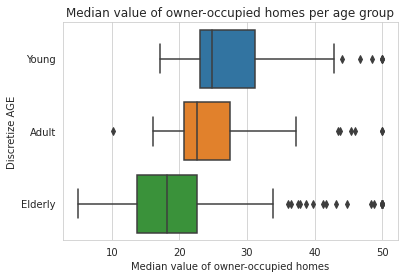

In [129]:
boston_df["Discretize AGE"] = pd.cut(boston_df["AGE"], bins=[0, 35, 70, 100], labels=["Young", "Adult", "Elderly"])
ax = sns.boxplot(data=boston_df, x="MEDV", y="Discretize AGE")
ax.set(xlabel="Median value of owner-occupied homes", ylabel="Discretize AGE", title="Median value of owner-occupied homes per age group")

[Text(0.5, 0, 'Nitric oxide concentrations'),
 Text(0, 0.5, 'Proportion of non-retail business acres per town'),
 Text(0.5, 1.0, 'Nitric oxide concentrations vs non-retail business acres')]

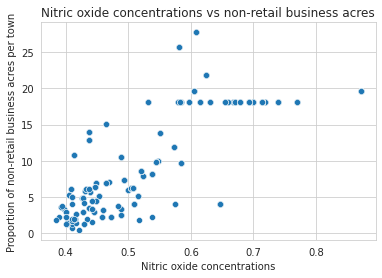

In [130]:
ax = sns.scatterplot(data=boston_df, x="NOX", y="INDUS")
ax.set(xlabel="Nitric oxide concentrations", ylabel="Proportion of non-retail business acres per town", title="Nitric oxide concentrations vs non-retail business acres")

Their is a positive relation between the concentration of Nitric Oxides and the proportion of non-retail business areas per town. Pass the value 0.65 of Nitric Oxides concentration, the industrial area remains approximately the same.

[Text(0.5, 0, 'Pupil to Teacher Ratio'), Text(0.5, 1.0, 'Pupil distribution')]

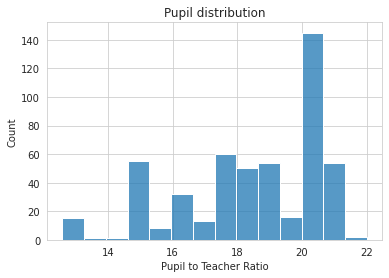

In [131]:
ax = sns.histplot(data=boston_df, x="PTRATIO")
ax.set(xlabel="Pupil to Teacher Ratio", title="Pupil distribution")

# **Task 5: Use the appropriate tests to answer the questions provided**

## **T-Test**

State the hypothesis

*   $H\_0: µ\_1 = µ\_2$ ("there is no difference in median value of houses bounded by the Charles river")
*   $H\_1: µ\_1 ≠ µ\_2$ ("there is a difference in median value of houses bounded by the Charles river")

[Text(0.5, 0, 'Distribution'), Text(0, 0.5, 'Frequency')]

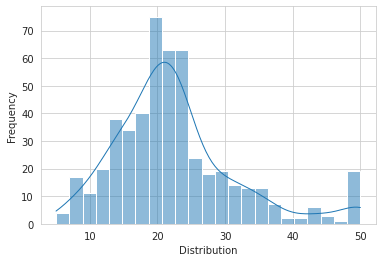

In [132]:
ax = sns.histplot(boston_df['MEDV'],
                  kde=True,
                  line_kws={"linewidth": 1,'alpha':1})
ax.set(xlabel='Distribution', ylabel='Frequency')

In [133]:
scipy.stats.levene(boston_df[boston_df['CHAS'] == 0.0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1.0]['MEDV'], center='mean')

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

Since the p-value is less than 0.05 we can assume unequality of variance

In [134]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0.0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1.0]['MEDV'], equal_var = False)

Ttest_indResult(statistic=-3.113291312794837, pvalue=0.003567170098137517)

**Conclusion**: Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference in teaching evaluations based on the Charles river

## **ANOVA**

State the hypothesis

*   $H\_0: µ\_1 = µ\_2 = µ\_3$ (the three population means are equal)
*   $H\_1:$ At least one of the means differ

In [135]:
scipy.stats.levene(boston_df[boston_df['Discretize AGE'] == 'Young']['MEDV'],
                   boston_df[boston_df['Discretize AGE'] == 'Adult']['MEDV'],
                   boston_df[boston_df['Discretize AGE'] == 'Elderly']['MEDV'], center='mean')

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

Since the p-value is greater than 0.05 we can assume equality of variance

In [136]:
scipy.stats.f_oneway(boston_df[boston_df['Discretize AGE'] == 'Young']['MEDV'],
                     boston_df[boston_df['Discretize AGE'] == 'Adult']['MEDV'],
                     boston_df[boston_df['Discretize AGE'] == 'Elderly']['MEDV'])

F_onewayResult(statistic=36.40764999196599, pvalue=1.7105011022702984e-15)

**Conclusion**: Since the p-value is less than 0.05, we will reject the null hypothesis as there is significant evidence that at least one of the means differ.

# Pearson Correlation

State the hypothesis:

*   $H\_0:$  Nitric oxide concentrations is not correlated with the proportion of non-retail business acres per town
*   $H\_1:$  Nitric oxide concentrations is correlated with the proportion of non-retail business acres per town


In [137]:
scipy.stats.pearsonr(boston_df['INDUS'], boston_df['NOX'])

(0.7636514469209151, 7.913361061238693e-98)

**Conclusion:** Since the p-value is greater than 0.05, we reject the Null hypothesis that there is no relationship between the Nitric oxide concentration and the proportion of non-retail business acres per town.




## **Regression analysis**

In [138]:
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 09 Dec 2022   Prob (F-statistic):           1.21e-08
Time:                        06:50:10   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion**: There is an additional impact of 1.0916 of weighted distance to the five Boston employment centres on the median value of owner occupied homes.